<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDB dataset provides multiple information's about Movies.


### Question(s) for Analysis
- What is the relationship between popularity and vote average?
- What is the distribution of movie release dates?


Maybe grouping the data in different ways (e.g. by year, by genre, etc.) to see if any patterns emerge.

# Dataset information
The first dataset contains the following features:

- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.
- The second dataset has the following features:-

- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is in fact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie received.
- vote_count - the count of votes received.


### Data Cleaning
 

In [270]:
import pandas as pd

df_movies = pd.read_csv('./data/tmdb_5000_movies.csv')
df_credits = pd.read_csv('./data/tmdb_5000_credits.csv')

first we must merge the two datasets based on the `movie_id` provided

In [271]:
df_credits.columns = ['id','title','cast','crew']
df_movies = df_movies.merge(df_credits, on='id')

df_movies.drop(columns=['title_x'], inplace=True)
df_movies.rename(columns={'title_y': 'title'}, inplace=True)
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# Data Wrangling

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

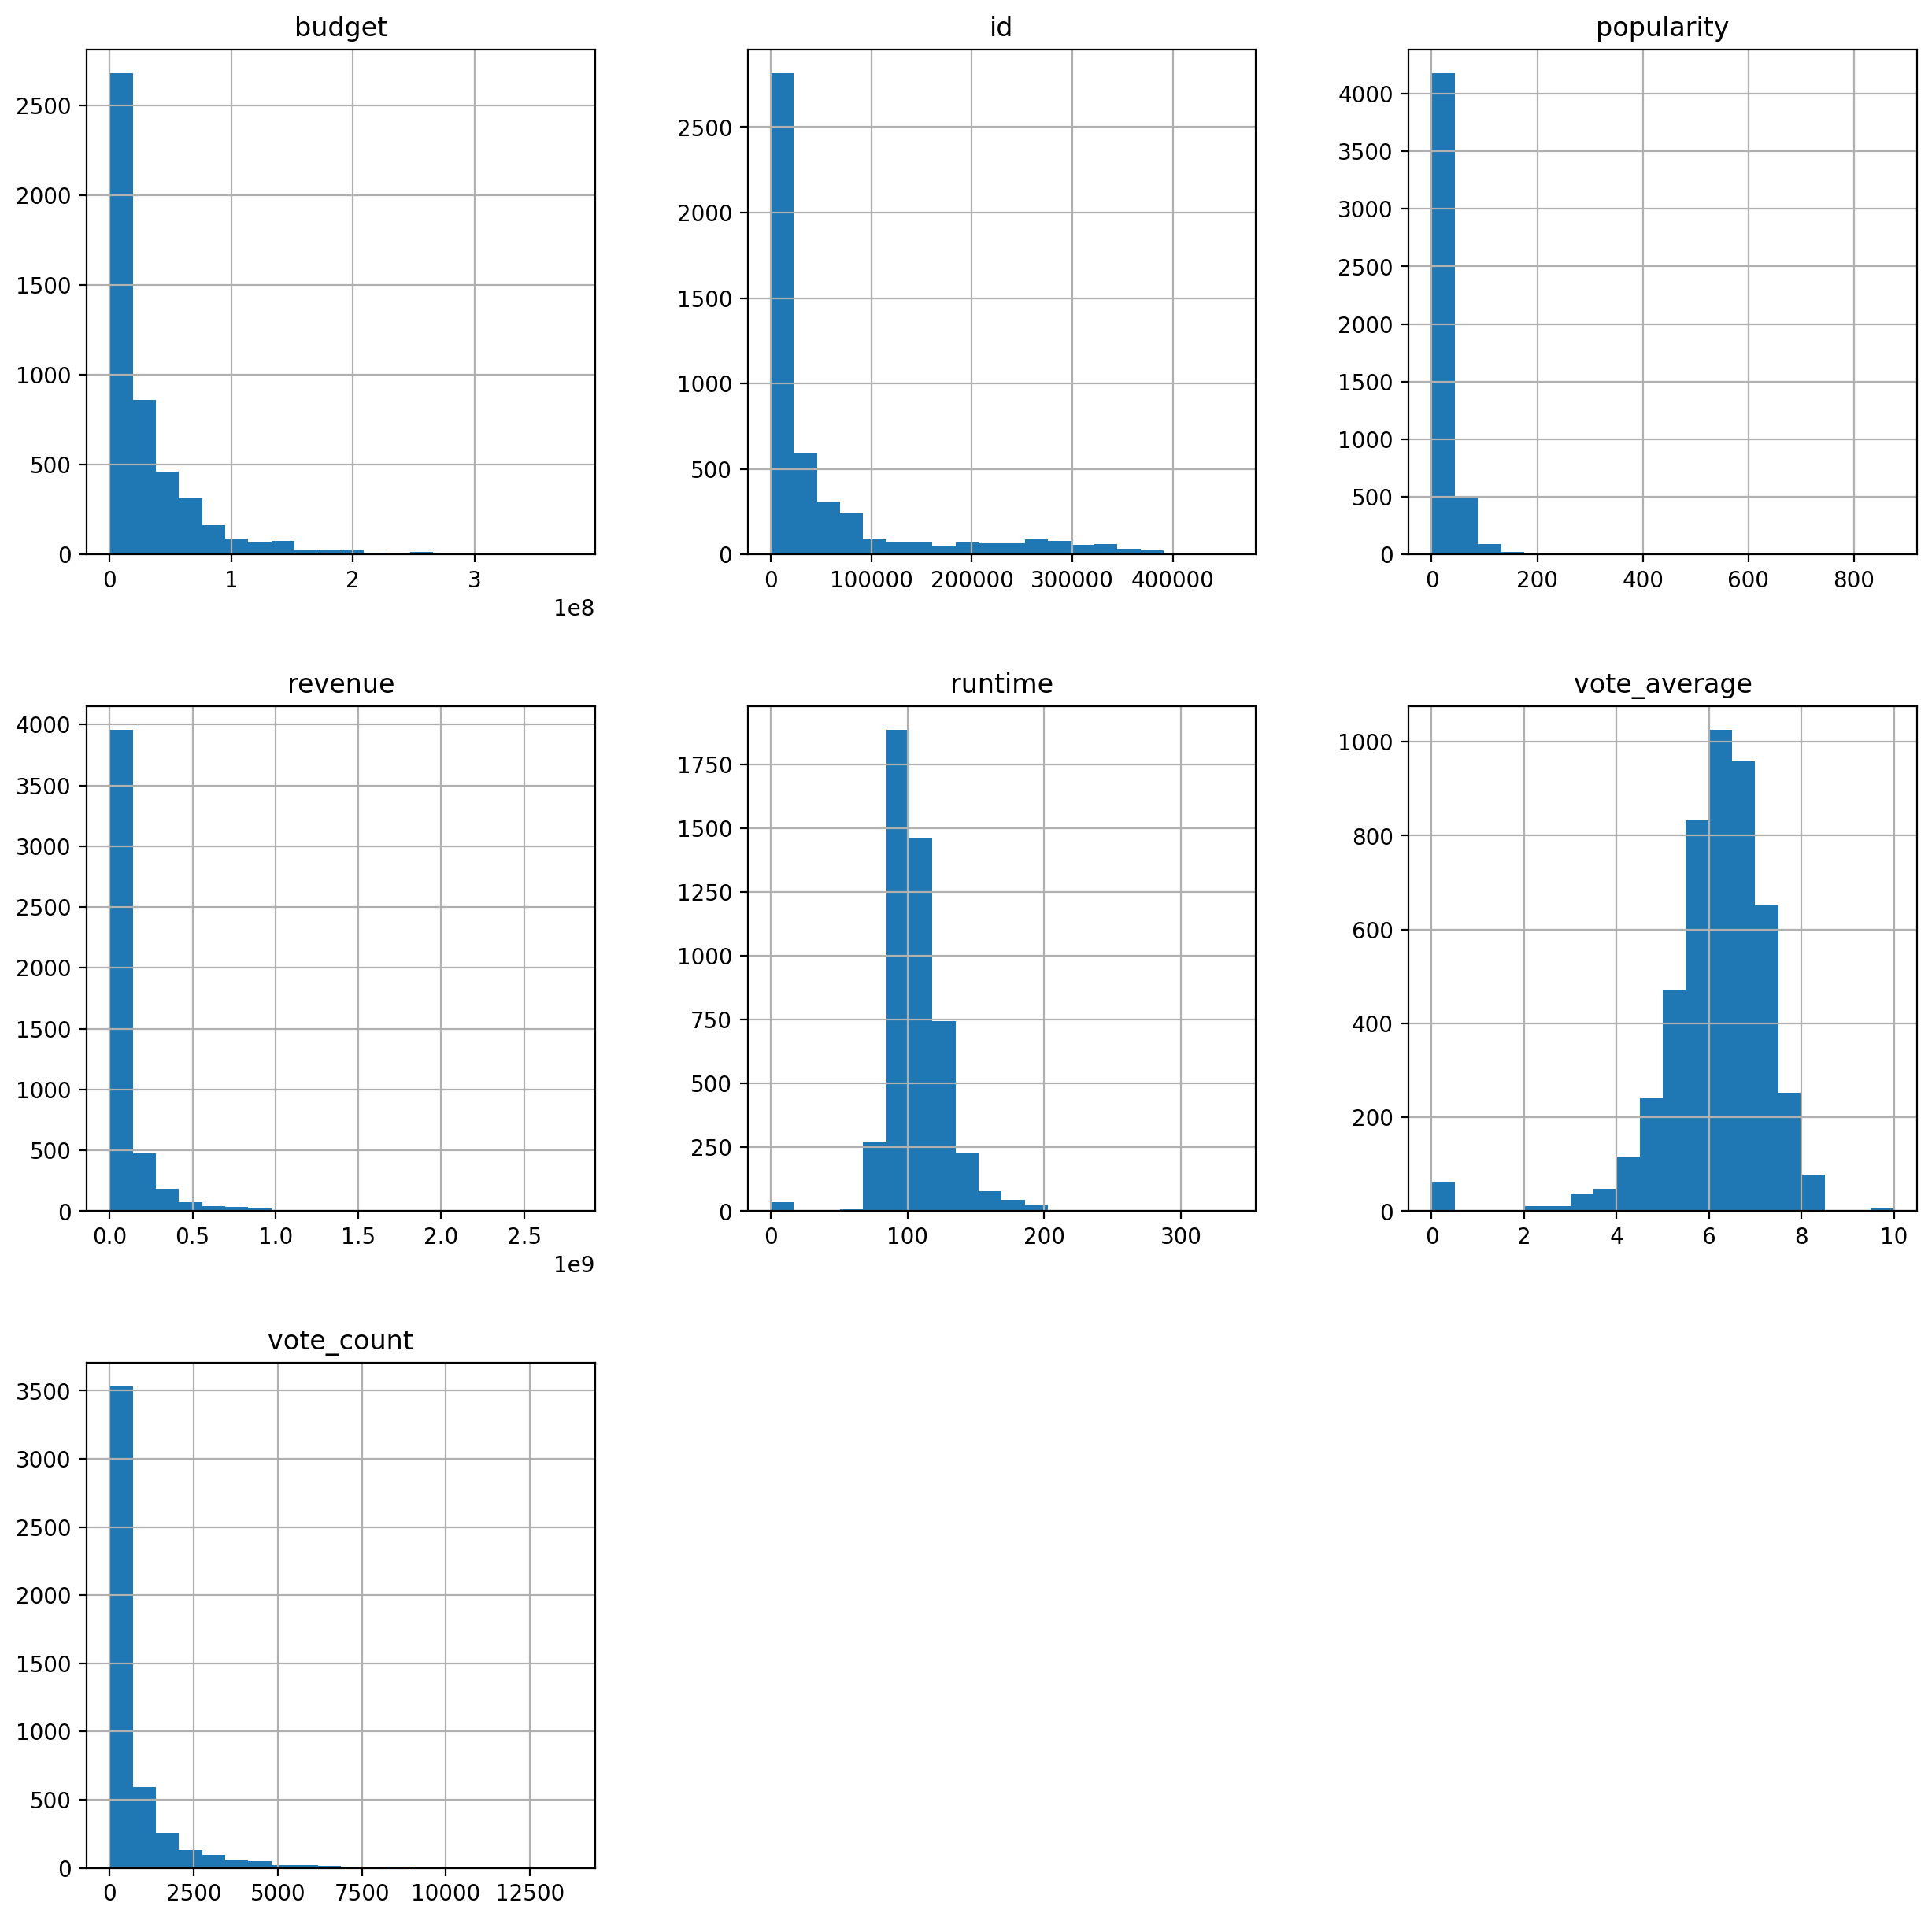

In [272]:
df_movies.hist(figsize=(15, 15), bins=20)

we check the dataset for duplicated data first based on ID and on the title

In [273]:
sum(df_movies.duplicated(subset=['id'], keep=False))

0

In [274]:
df_movies[df_movies.duplicated(subset=['title'], keep=False)]['title']

972            The Host
1359             Batman
2877           The Host
3647    Out of the Blue
3693    Out of the Blue
4267             Batman
Name: title, dtype: object

the dataset shows tree films as duplicates. `The Host`, `Batman` and `Out of the Blue`. We will delete the double entries now

In [275]:
df_movies.drop_duplicates(subset='title', keep='last')
sum(df_movies.duplicated(subset=['title']))


3

Cleanup the dataset by droping colums and rows we don't need

In [276]:
df_movies.drop(['homepage', 'genres', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'cast', 'crew'], axis=1, inplace=True)
df_movies.columns

Index(['budget', 'id', 'keywords', 'popularity', 'release_date', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'title'],
      dtype='object')

### Dealing with missing values
To work with rows which have missing values, the mean of all values inside a column could used to fill them.
If this is not usefull, the rows will be droped

In [277]:
df_movies.columns[df_movies.isnull().any()]

Index(['release_date', 'runtime'], dtype='object')

rows with a missing `release` date will be droped. Providing a mean value would not make sens.

In [278]:
df_movies.dropna(subset='release_date', inplace=True)
df_movies.release_date.isna().sum()

0

now its time to to calculate the mean of the `runtime` colums and fill our NaN values with it

In [279]:
mean_runtime = df_movies.runtime.mean()
mean_runtime

106.898125

In [280]:
df_movies.runtime.fillna(mean_runtime, inplace=True)
df_movies.release_date.isna().sum()

0

to work better with date times we must convert the `release_date` colum to pandas datetime

In [ ]:
df_movies.release_date = pd.to_datetime(df_movies.release_date)

In [ ]:
df_movies.dtypes

budget                   int64
id                       int64
keywords                object
popularity             float64
release_date    datetime64[ns]
revenue                  int64
runtime                float64
vote_average           float64
vote_count               int64
title                   object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

# What is the distribution of movie release dates?

Lets get a feeling for the time range we are talking about.

<AxesSubplot:>

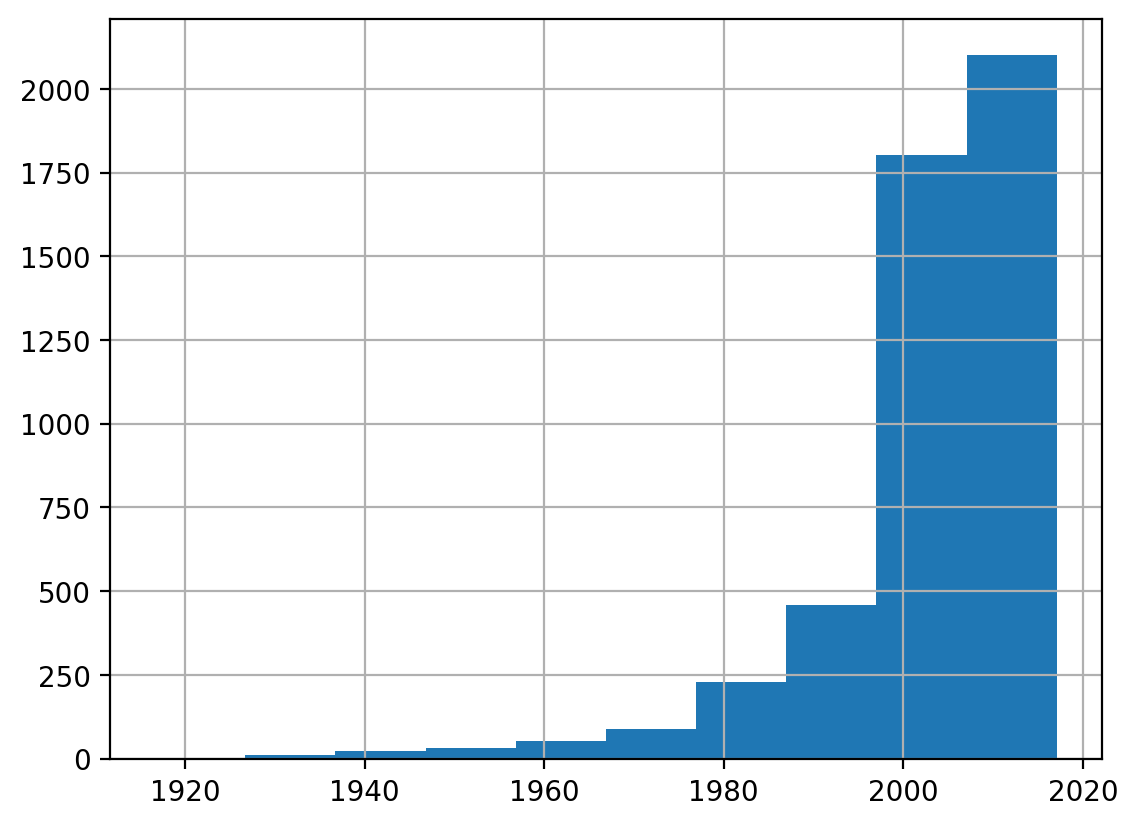

In [ ]:
df_movies.release_date.hist()

At the first glance we have our first record from 1916 and the last one from 2017. In total 4802 Entries in our dataset.

A graph should show a quick and simple then most films there released.

In [ ]:
def apply_labels(plt, title: str, x_lable: str, y_lable: str):
  plt.xlabel(x_lable)
  plt.ylabel(y_lable)
  plt.title(title)



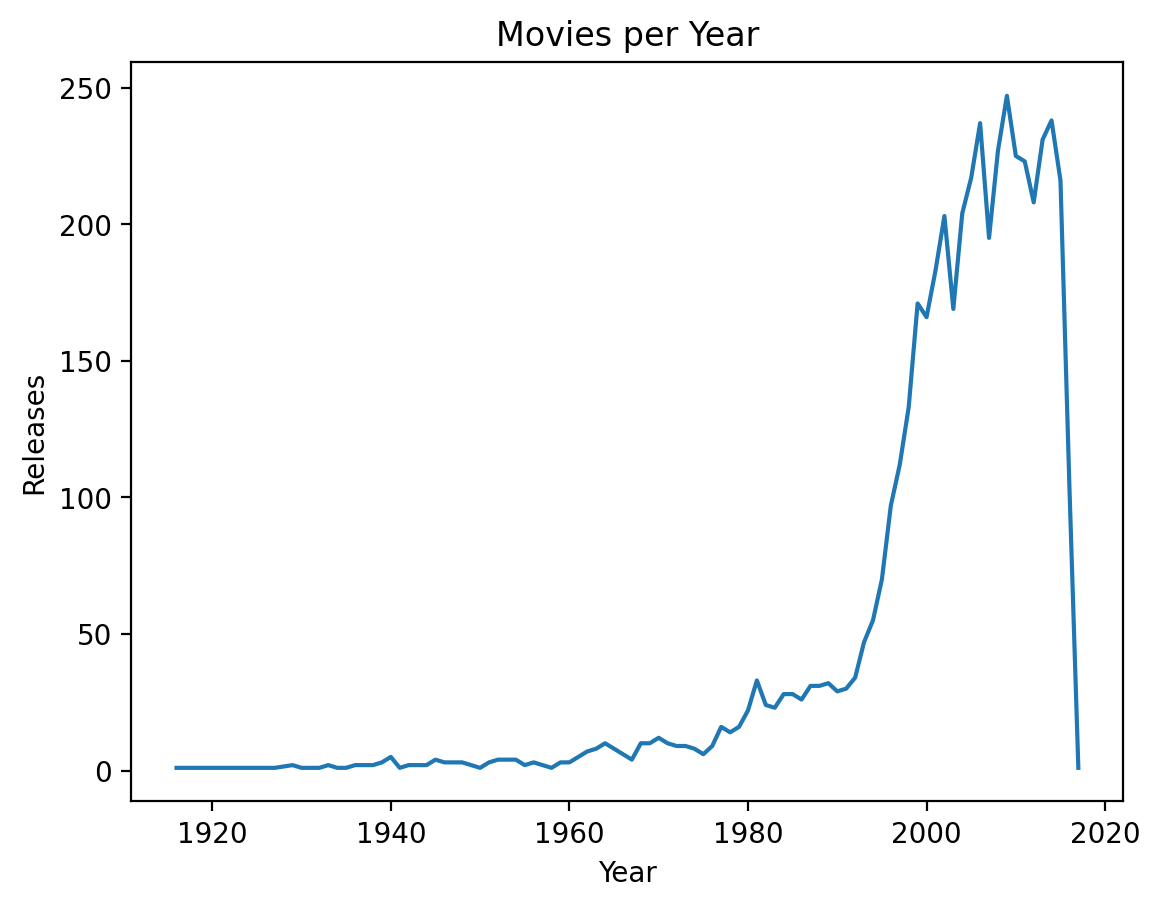

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


movies_per_year = df_movies.groupby(df_movies.release_date.dt.year).size()

plt.plot(movies_per_year)

apply_labels(plt, 'Movies per Year', 'Year', 'Releases')

plt.show()


Now let's see in which Month films got released on average

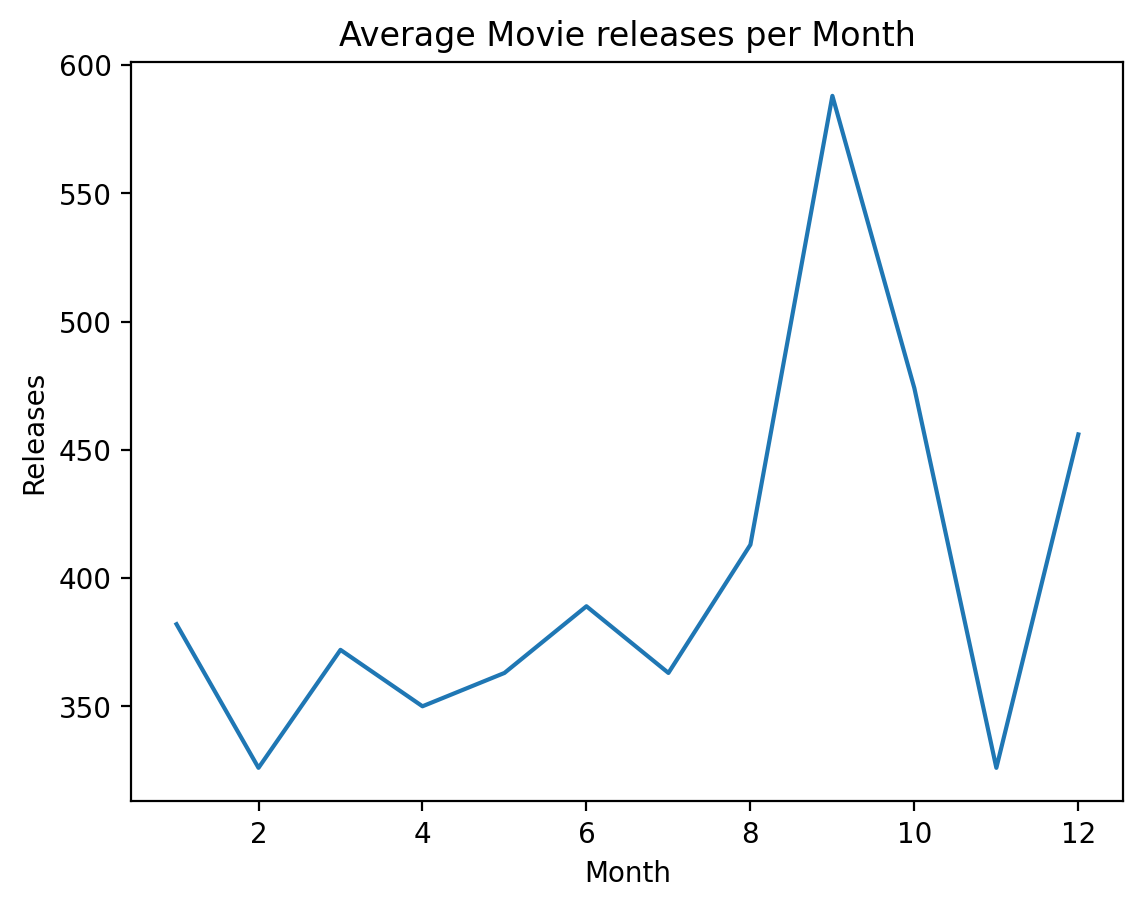

In [ ]:
average_release_month = df_movies.groupby(df_movies.release_date.dt.month).size()

average_release_month
plt.plot(average_release_month)

apply_labels(plt, 'Average Movie releases per Month', 'Month', 'Releases')

plt.show()

### What is the relationship between popularity and vote average?
the vote_average feature is currently not in any relation to vote_count. We must include votes_weighted to see what how each vote for each movie can relate to each other.

In [ ]:
df_movies["votes_weighted"] = df_movies["vote_count"] / df_movies["vote_average"] / 100.0

In [ ]:
df_movies["profit"] = df_movies["revenue"] - df_movies["budget"]

/opt/conda/lib/python3.9/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


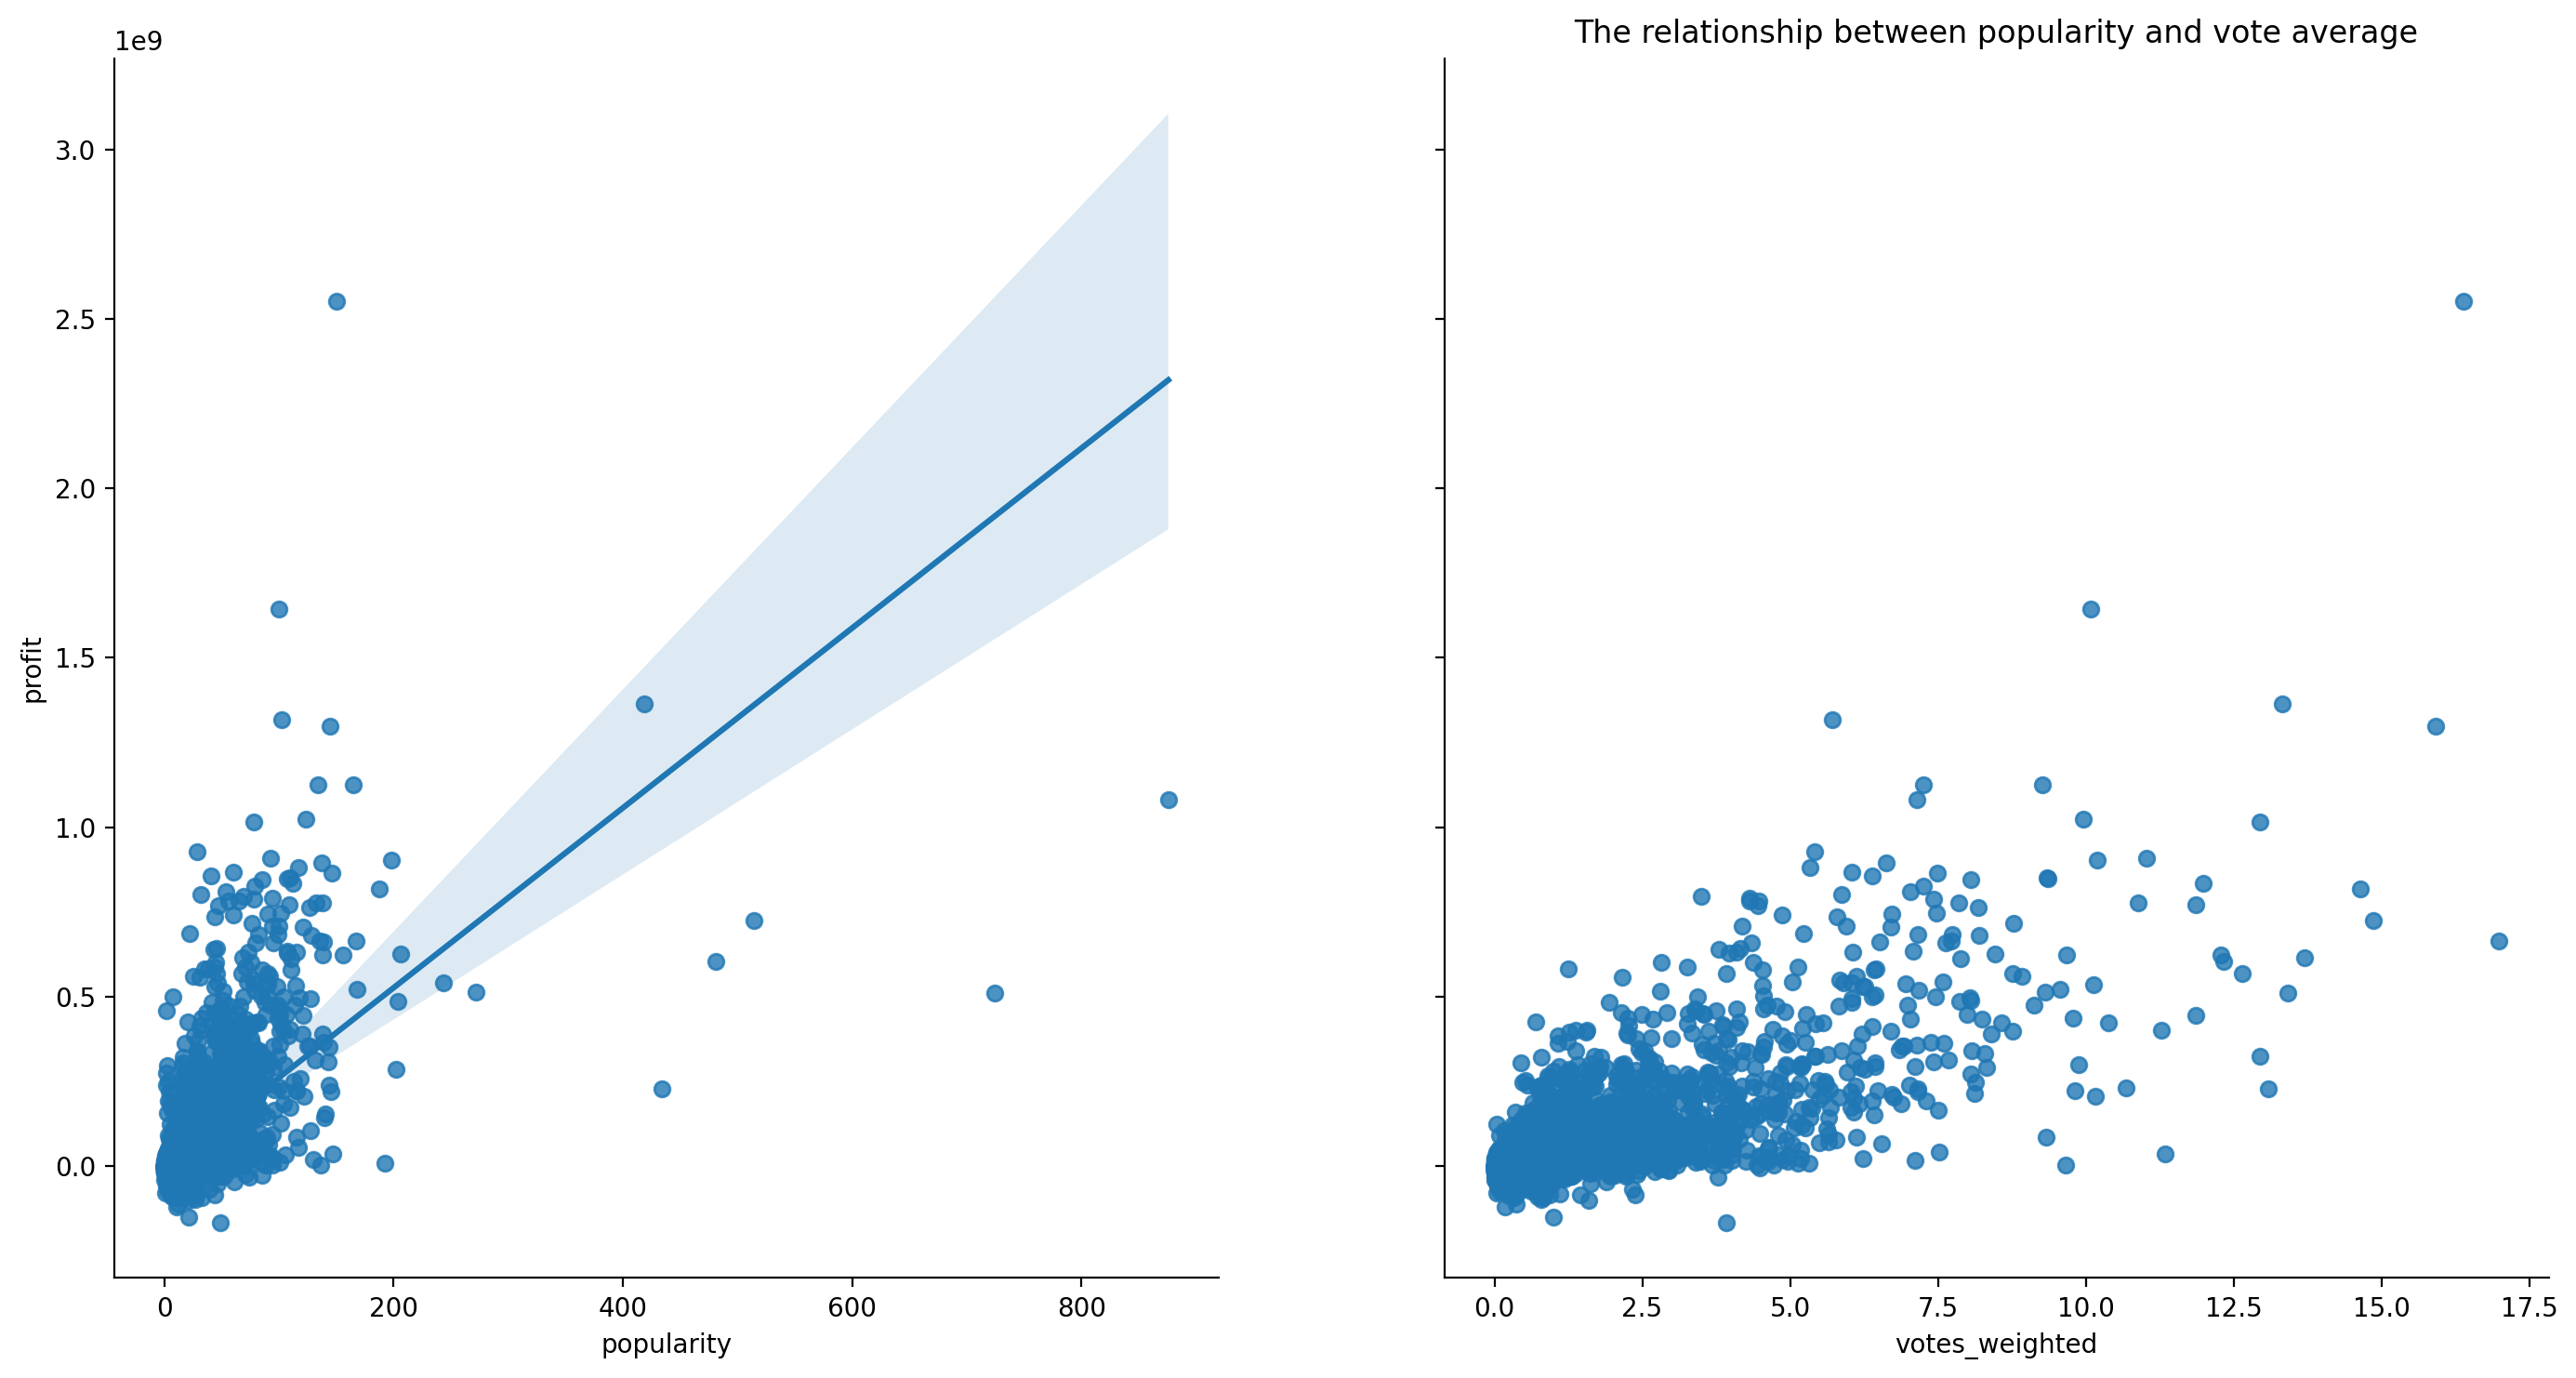

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df_vote_correlation = pd.DataFrame()

df_vote_correlation['popularity'] = df_movies.popularity
df_vote_correlation['votes_weighted'] = df_movies.vote_average

g = sns.PairGrid(df_movies, y_vars=["profit"], x_vars=["popularity", "votes_weighted"])
g.map(sns.regplot)
g.fig.set_size_inches(16, 9)

plt.title('The relationship between popularity and vote average')

plt.show()